In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.32


In [3]:
def build(robot):
    box1=Box(robot,x=3,y=9.5,name="right")
    box2=Box(robot,x=3,y=11.5,name="left")    
    
    connect(box1,box2,"weld")
    
    disk1=Disk(robot,x=2,y=10.5,name="center")
    
    connect(disk1,box1,"distance")
    connect(disk1,box2,"distance")    

In [4]:
def act1(t,robot):
    robot.message="Act 1"
    if t>5:
        return True
    

In [5]:
def act2(t,robot):
    robot.message="Act 2"
    if t>5:
        return True
    

In [6]:
def act3(t,robot):
    robot.message="Act 3"
    if t>5:
        return True
    

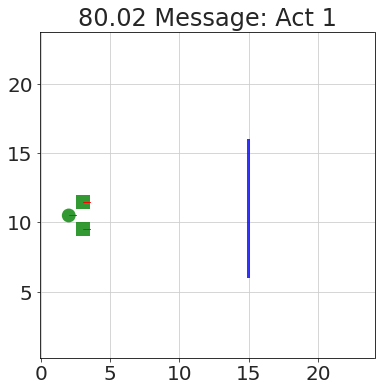

In [7]:
env=Environment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=15,y=11,width=0.2,height=10)


run_sim(env,[act1,act2,act3],
        figure_width=6,
       total_time=80,
       dt_display=0.5,  # make this larger for a faster display
       )

## rewrite the distance sensor example in terms of behaviors

In [8]:
def forward(t,robot):
    robot['left'].F=0.1
    robot['right'].F=0.1
    robot.message='Forward'
    return True

def backward(t,robot):
    robot['left'].F=-0.1
    robot['right'].F=-0.1
    robot.message='Backward'
    return True

def until_close(t,robot):
    distance=robot['center'].read_distance()
    robot.message='Until Close'
    if distance<10:
        return True
    
def until_far(t,robot):
    distance=robot['center'].read_distance()
    robot.message='Until Far'
    if distance>10:
        return True
    


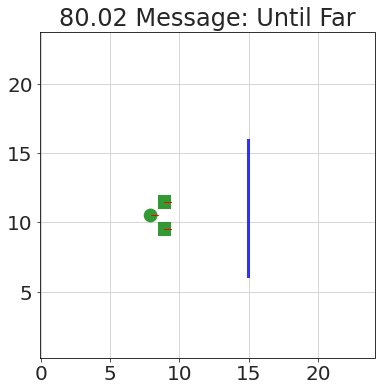

In [9]:
env=Environment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=15,y=11,width=0.2,height=10)


run_sim(env,[forward,until_close,backward,until_far],
        figure_width=6,
       total_time=80,
       dt_display=0.5,  # make this larger for a faster display
       )